# Installing pydub

Since, in this competition, Internet is not allowed, I've uploaded the latest version of `pydub` into [this](https://www.kaggle.com/gabrielmilan/pydub0241) dataset so we can install it and use it for converting MP3 audio into `numpy` arrays. Thanks for [Chris' explanation](https://www.kaggle.com/c/severstal-steel-defect-detection/discussion/113195) on how to do this.

I've extracted the code from [this page](https://stackoverflow.com/questions/53633177/how-to-read-a-mp3-audio-file-into-a-numpy-array-save-a-numpy-array-to-mp3) on StackOverflow. Hope you enjoy.

In [ ]:
! pip install pydub

# Loading sample

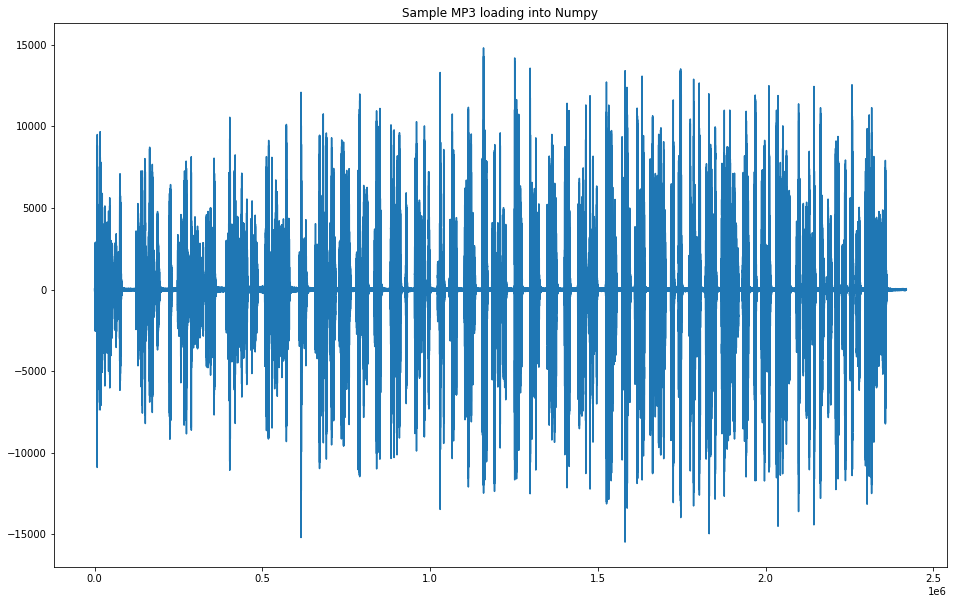

In [ ]:
import pydub 
import numpy as np

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")
    
audio_file = '/content/Musntanggg.wav'
sr, x = read(audio_file)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(x)
plt.title("Sample MP3 loading into Numpy")
plt.show()

In [ ]:
import wave
import numpy as np
import sys
import matplotlib.pyplot as  plt